# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv('data/Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# Method 1
employee.pivot_table('Salary', index='Department', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
employee.pivot_table('Salary', index=['Department', 'Title'], aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(['Salary', 'Years'], index=['Title'], aggfunc='mean')


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
employee.pivot_table(['Salary'], index=['Department', 'Title'], aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
employee.pivot_table('Salary', index=['Department', 'Title'], aggfunc=[np.median, 'min', 'max', np.std])
# Since by grouping like that sometimes we have only 1 value taken, its median, min and max are all the same, and standard deviation is not possible to calculate.

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
employee.pivot_table('Salary', index=['Department', 'Title'], aggfunc=[np.median, 'min', 'max', np.std], fill_value=0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
employee.pivot_table(['Salary'], index='Department', aggfunc=['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
employee.pivot_table(['Years', 'Salary'], index=['Department', 'Title'], aggfunc={'Years' : 'sum', 'Salary' : 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
def alt_mean(series):
    series = list(series)
    series.remove(max(series))
    return round(np.mean(series), 2)

employee.pivot_table('Salary', index='Department', aggfunc=alt_mean)

,Salary
Department,
HR,32.50
IT,41.67
Sales,55.00


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [14]:
fitbit = pd.read_csv('data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [15]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

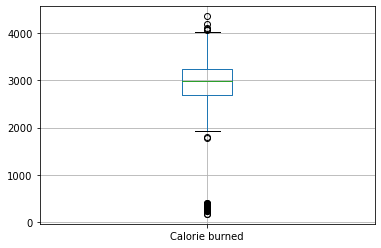

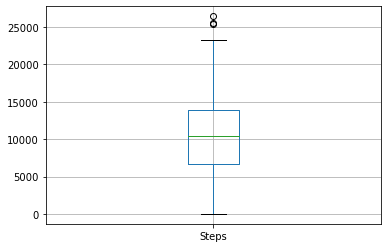

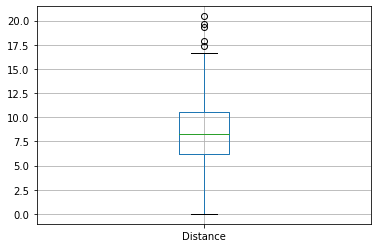

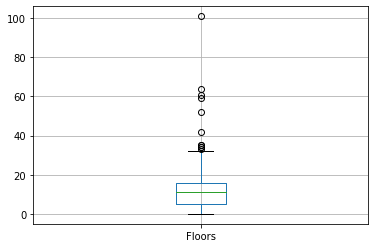

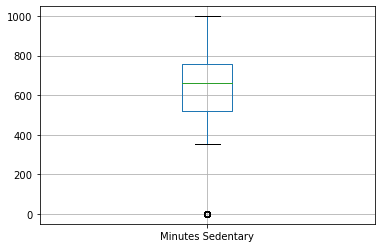

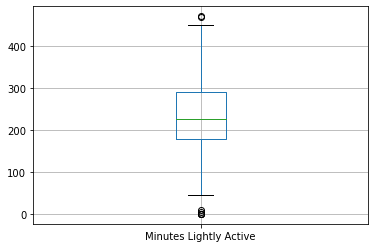

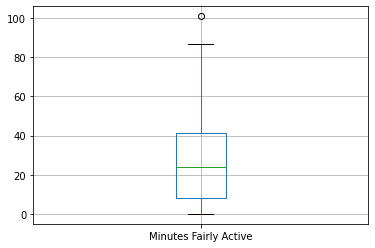

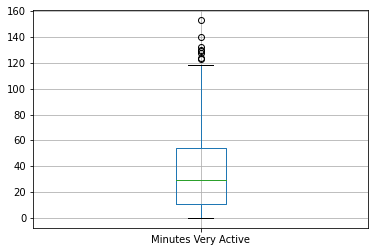

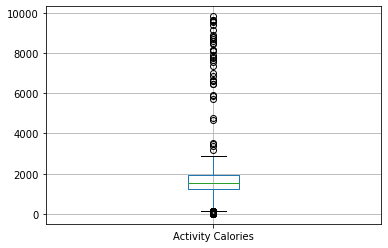

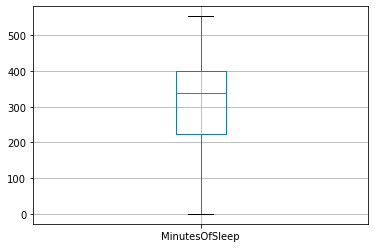

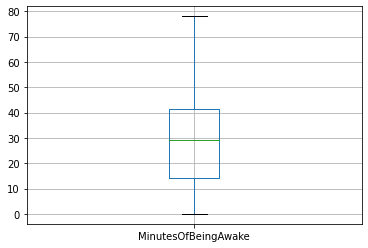

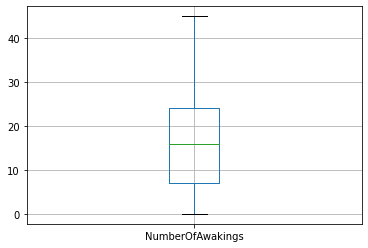

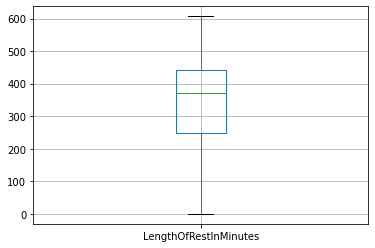

In [41]:
cols = fitbit.columns[1:]
for col in cols:
    fitbit.boxplot(column=col)
    plt.show()

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [43]:
np.corrcoef(fitbit['Minutes Very Active'], fitbit['Steps'])

array([[1.        , 0.57145185],
       [0.57145185, 1.        ]])

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

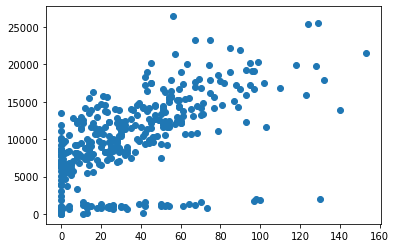

In [44]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

*Seems like there's a general tendency for the variable Steps to increase when the Minute Very Active variable increases as well, even if we can tell that, sometimes, the number of steps remains quite low even when the Minute Very Active is high.*

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [45]:
np.corrcoef(fitbit['Minutes Sedentary'], fitbit['Steps'])

array([[1.        , 0.07690608],
       [0.07690608, 1.        ]])

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

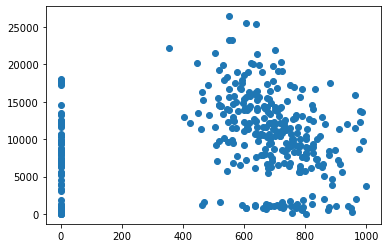

In [46]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

*These two variables are poorly correlated, and there's not any visible trend between the increase of the independent variable and an increase/decrease of the dependent one.*

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

[[1.         0.13098566]
 [0.13098566 1.        ]]


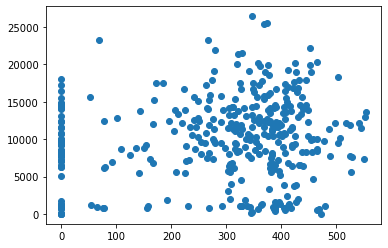

In [49]:
print(np.corrcoef(fitbit['MinutesOfSleep'], fitbit['Steps']))
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.show()

*Here also we have a weak correlation between the two variables.*

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [50]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [52]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [53]:
time_grades = pd.read_csv('data/Time_Grades.csv')

#### Show visually the frequency distribution of the time_grades dataset.

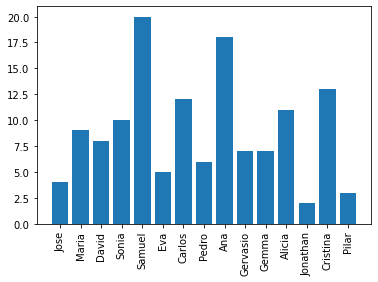

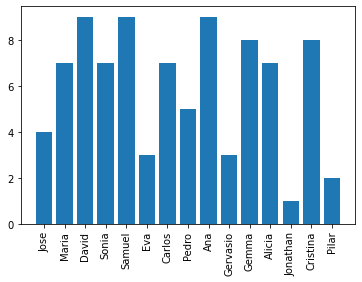

In [56]:
plt.bar(time_grades['Name'], time_grades['Study time'])
plt.xticks(rotation='vertical')
plt.show()
plt.bar(time_grades['Name'], time_grades['Grade'])
plt.xticks(rotation='vertical')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [63]:
pearson = time_grades.corr()
spearman = time_grades.corr(method='spearman')
print(pearson)
print(spearman)

            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000
            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

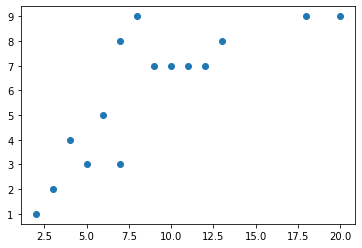

In [64]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

*Pearson correlation tests the two variables in search of a **linear** correlation, while Spearman correlation is interested only in catching the general trend (that is, it only cares to see if, when the independent variable increases, the dependent variable increases/decreases, with no interest in the fact that this relatioship is linear).*